In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
from matplotlib.dates import date2num, DateFormatter
from sklearn.linear_model import LinearRegression
import numpy as np


/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_35570/521585596.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small.sort_values("date", inplace=True)
/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_35570/521585596.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big.sort_values("date", inplace=True)
/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_35570/521585596.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

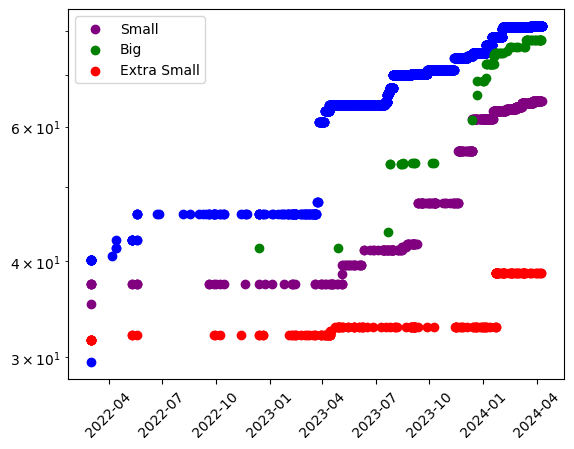

In [8]:

df = pd.read_csv("ModelBenchDates.csv", parse_dates=["creation_date"], dayfirst=True)
df["date"] = pd.to_datetime(df["creation_date"])
# removes elements with 0 parameters
df.dropna(subset=["#Params (B)"])
df = df[df["#Params (B)"] > 0]

# df["date"] = df["date"].apply(date2num)


# plt.scatter(df['date'], df['#Params (B)'])
extra_small = df[(df["#Params (B)"] < 1) & (df["#Params (B)"] > 0.1)]
small = df[(df["#Params (B)"] < 5) & (df["#Params (B)"] > 1)]
big = df[(df["#Params (B)"] > 20) & (df["#Params (B)"] < 25)]
# plt.scatter(small['date'], small['Average'], color='red')
# plt.scatter(big['date'], big['Average'], color='green')


# track max over time
# sort df by date
df.sort_values("date", inplace=True)
maxs = []
for i in range(len(df)):
    maxs.append(df["Average"][:i].max())
plt.scatter(df["date"], maxs, color="blue")
# make x ticks sideways
plt.xticks(rotation=45)


# now do same with small
small.sort_values("date", inplace=True)
maxs = []
for i in range(len(small)):
    maxs.append(small["Average"][:i].max())
plt.scatter(small["date"], maxs, color="purple", label="Small")


big.sort_values("date", inplace=True)
maxs = []
for i in range(len(big)):
    maxs.append(big["Average"][:i].max())
plt.scatter(big["date"], maxs, color="green", label="Big")


extra_small.sort_values("date", inplace=True)
maxs = []
for i in range(len(extra_small)):
    maxs.append(extra_small["Average"][:i].max())
plt.scatter(extra_small["date"], maxs, color="red", label="Extra Small")
plt.yscale("log")
plt.legend()


In [ ]:
#plot the performance of small models over time 
plt.scatter(small['date'], small['Average'], color='red')
plt.scatter(big['date'], big['Average'], color='green')

In [ ]:
# graph the distribtuion of "Average" across dataset
plt.hist(df["Average"], bins=100)



In [ ]:

good_perform = df[(df["Average"] > 70) & (df["Average"] < 100)]
good_perform["popularity"] = good_perform["Hub â€šÃ¹Â§Ã”âˆÃ¨"]
good_perform = good_perform[good_perform["popularity"] < 200]
plt.scatter(good_perform["TruthfulQA"], good_perform["popularity"])
plt.xlabel("TruthfulQA")
plt.ylabel("popularity")

In [ ]:

plt.scatter(good_perform["date"], good_perform["#Params (B)"], color="blue")
plt.yscale("log")





In [ ]:

# now hold performance constant and see how min params changes
good_perform.sort_values("date", inplace=True)
mins = []
for i in range(len(good_perform)):
    mins.append(good_perform["#Params (B)"][:i].min())
plt.scatter(good_perform["date"], mins, color="purple")
plt.yscale("log")



In [ ]:
# Initialize lists to store the first minimum parameters and corresponding dates
firstmindate = []
firstminparams = []
minparam = float("inf")

good  = good_perform
good['Parameters'] = good['#Params (B)']
# Loop through the dataframe to find the first minimum parameters
for i in range(len(good)):
    if minparam > good["Parameters"].iloc[i]:
        date = good["date"].iloc[i]
        if pd.notna(date):
            firstmindate.append(date)
            firstminparams.append(good["Parameters"].iloc[i])
            minparam = good["Parameters"].iloc[i]

# Plot the data
plt.scatter(firstmindate, firstminparams, color="red")
plt.xlabel('Date')
plt.ylabel('Parameters')
plt.title('First Minimum Parameters Over Time')
plt.yscale('log')
plt.show()


In [ ]:
#comparing two 